## Density Based Clustering

Most of the traditional clustering techniques such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionaly, Density based clustering locates regions of high density that are separated from one another by regions of low density. Density, in the context is defined by number of points within a specified radius.

In [21]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

### Data generation
The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>

In [2]:
def CreateDataPoints(centroidLocation, numSamples, clusterDeviation):
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation)
    
    # standardize features by removing the mean and scaling into unit variance
    X = StandardScaler().fit_transform(X)
    
    return X, y

In [3]:
X, y = CreateDataPoints([[4, 3], [2, -1], [-1, 4]], 1500, 0.5)

In [4]:
print(X.shape, y.shape)

(1500, 2) (1500,)


## Modeling

__DBSCAN__ stands for **Density-Based Spatial Clustering of Applications with Noise**. This technique is one of the most common clustering algorithms which works based on the density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to a lot of other points in that cluster.

- It works based on two parameters: __EPSILON__, __minimumSamples__
1. Epsilon : Determines a specified radius that if includes enough numbers of points within, we call it a dense area
2. minimunSamples : Determines the minimum number of data points we want in a neighbourhood to define a cluster

In [7]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
assert labels.shape == y.shape

## Distinguish outliers

As DBSCAN is robust to outliers, let's have a look at this. 
Let's replace all elements with 'True' in core_samples_mask that are in the clusters; 'False' if the points are outliers.


In [8]:
# create an array of booleans using the labels from db
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
from collections import Counter
count = Counter()
for i in core_samples_mask:
    count[i] += 1
count

Counter({True: 1493, False: 7})

In [17]:
#numbers of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

3

In [19]:
unique_labels = set(labels)
unique_labels

{0, 1, 2}

## Data Visualisations


In [23]:
# create colors for the clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

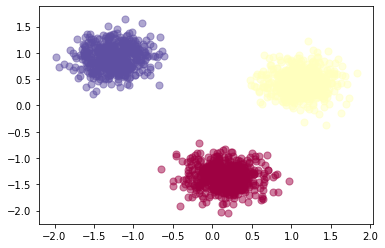

In [27]:
# plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # black used for noise
        col = 'k'
    class_member_mask = (labels == k)
    
    # plot the datapoits that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)
    
    # plot the outliers 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

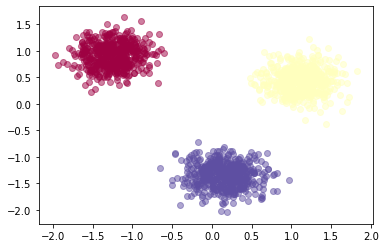

In [28]:
# compare with kMeans
from sklearn.cluster import KMeans

k = 3
k_means3 = KMeans(init='k-means++', n_clusters=k, n_init=12)
k_means3.fit(X)
plt.figure()
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], c=[col], marker='o', alpha=0.5)
    
plt.show()